In [25]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.
import matplotlib.image as plti

import warnings     # (Opcional) Es para evitar algunos mensajes de warning.
warnings.filterwarnings('ignore')

#Para realizar los graficos en la misma linea de codigo.
%matplotlib inline

In [26]:
#Matriz de transformación para YIQ.
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

#Matriz de transformación para RGB.
M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

#Función para operaciones con matrices.
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

#Función simplificada para convertir RGB->YIQ.
def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

#Función simplificada para convertir YIQ->RGB.
def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

#Función para calcular el error medio cuadrático.    
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

#Función para calcular el error medio cuadrático (%)
def rmse_per(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_val = np.max([np.max(img1), np.max(img2)])
    return np.sqrt(mse) / max_val * 100

(900, 1200, 3)
(900, 1200)


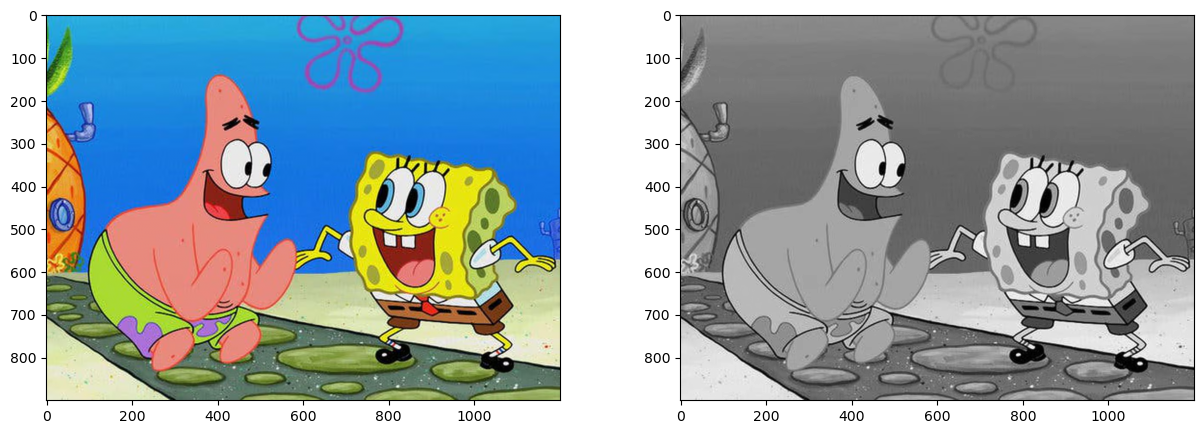

In [27]:
img_rgb = imageio.imread("img/bobesponja.png")/255

#Para la FFT usamos una imagen en grises (tomamos el canal Y)
img = rgb2yiq(img_rgb)[:,:,0]
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

#para ver si tiene los canales correctos.

print(img_rgb.shape) 
print(img.shape)     

1) Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica

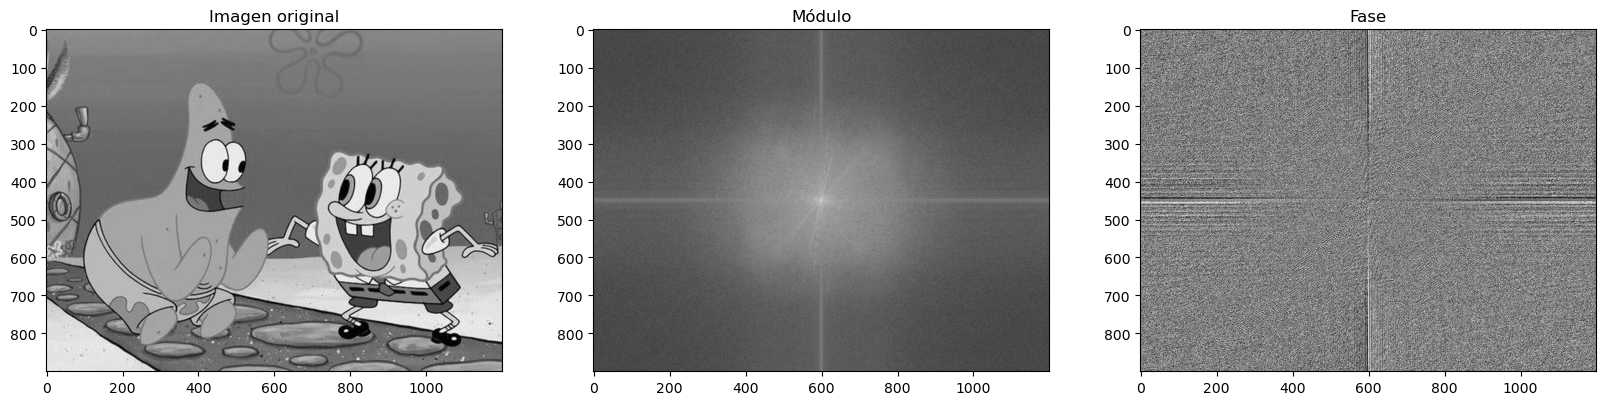

In [28]:
# De antes se q img es el canal Y de una imagen en YIQ
# Entonces... hago la fft
x = np.fft.fft2(img)

# Corro el (0,0) al centro de la imagen          
x = np.fft.fftshift(x)

# Calculo del modulo y fase
x_module = np.log(np.abs(x))  
x_phase = np.angle(x)

# Normalizo el modulo
minimo = x_module.min()
maximo = x_module.max()
x_module = (x_module - minimo) / (maximo - minimo)
#print('el modulo minimo es: ', x_module.min() )
#print('el modulo minimo es: ', x_module.max() )

# Normalizo la fase
x_phase = (x_phase+np.pi)/(2*np.pi)

# Ploteo
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(img, 'gray')
axes[0].set_title('Imagen original')
axes[1].imshow(x_module, 'gray')
axes[1].set_title('Módulo')
axes[2].imshow(x_phase, 'gray')
axes[2].set_title('Fase')
plt.show()

#me hace un poco de ruido, que haya normalizado los valores entre 0,1 y sin embargo, veo valores entre 0 y 900 aprox :/
#sin embargo al printear los valores max y min me devuelve q estan entre 0.0 y 1.0 asi q debe estar bien.

2) Guardar el espectro del módulo como imagen ".png" y modificarla (filtros)

In [29]:
plti.imsave("x_module_mod.png",x_module,cmap='gray')
plti.imsave("x_phase_mod.png",x_phase,cmap='gray')

3) Implementar la transformada inversa que convierta el espectro guardado en la imagen original

Text(0.5, 1.0, 'Imagen recuperada')

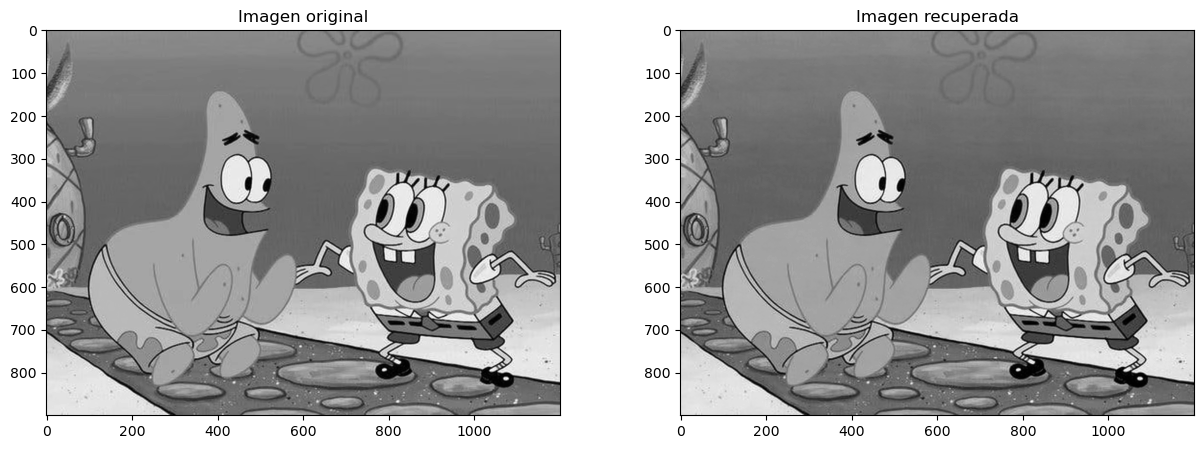

In [30]:
#cargo la fase y el modulo
modulo = imageio.imread("x_module_mod.png")[:,:,0]/255 
fase = imageio.imread("x_phase_mod.png")[:,:,0]/255 

#acomodo y hago la operacion
modulo = np.exp(modulo*(maximo-minimo)+minimo)                       
fase = ((fase)*(2*np.pi))-np.pi

y = modulo*np.cos(fase)+modulo*np.sin(fase)*1j

#Antitransformo...
inversa = np.abs(np.fft.ifft2(np.fft.ifftshift(y)))             

#ploteo
fig, axes = plt.subplots(1, 2, figsize=(15,5))       
axes[0].imshow(img,'gray')      
axes[0].set_title('Imagen original')
axes[1].imshow(inversa,'gray') 
axes[1].set_title('Imagen recuperada')

4) Calcular el error entre la imagen original y la recuperada

In [31]:
original = np.abs(np.fft.ifft2(np.fft.ifftshift(x))) #de la img original
#inversa = np.abs(np.fft.ifft2(np.fft.ifftshift(y))) ya calculado..

#Se muestra el error antes y despues
print('el error de img luego de fft: ' , rmse(original,img)*100)                              
print('el error de img luego de ifft: ' , rmse(inversa,img)*100)

el error de img luego de fft:  2.0914530484454784e-14
el error de img luego de ifft:  0.553277388624634
